In [13]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh20/inc90/BHOSS_CODE"
data = "Rh20_Rl1_sig1_i90_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_335.dat"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=0)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9243.486122 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check self.obs_freqs!
N_obs_freqs is now overlaid to len(self.obs_freqs)
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 5.64564e-18 0.00151898
Total flux = 2.109160 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 81
time: 9994.973143 Rg/c, inclination: 70.000000 deg, phi: 0.000000 deg, BH spin: 0.500000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
N_obs_freqs (81) is different from the exact number of the selelcted frequencies (1): check obs_freqs!
N_obs_freqs is now overlaid to len(obs_freqs)
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 8.89303e-16 0.00136536
Total flux = 2.116031 Jy at 230 GHz
135:26:46.287 - Start Program


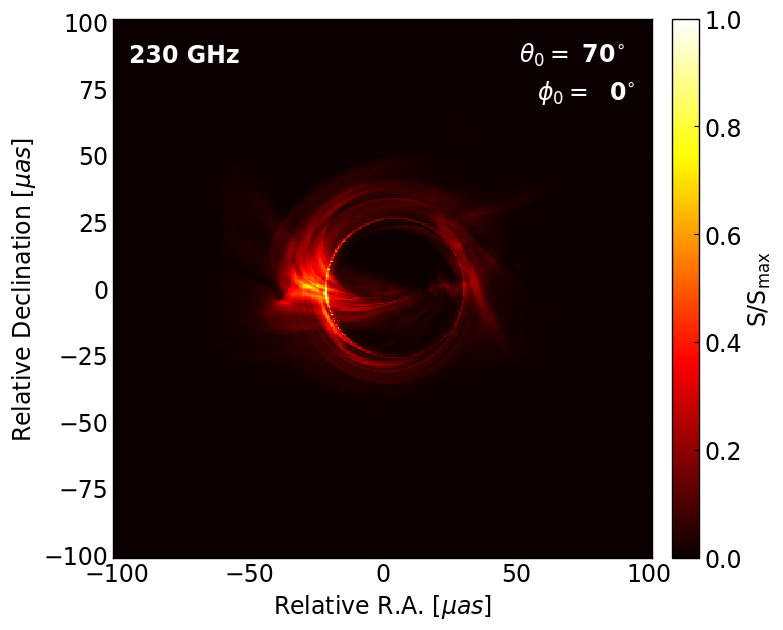

In [13]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [1]:
import os
import numpy as np

#find average flux
def bhoss_avg(Rhigh,Rlow,sig,inclination,phi0,model_name):

    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    else:
        print("no model")
        return
    
    if ((Rhigh==1) | (Rhigh==5) | (Rhigh==10) | (Rhigh==20) | (Rhigh==40) | (Rhigh==80) | (Rhigh==160)):
        Rh_str = "Rh%d"%Rhigh
    else:
        print("no model")
        return
    
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Rh_str,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    for image_ind in range(ind_start,ind_end+1):
        data_name="Rh%d_Rl%d_sig%d_i%d_ph%d_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_%s_%d.dat" \
        %(Rhigh,Rlow,sig,inclination,phi0,model_name,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+"Rh%d"%Rhigh,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [2]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 10, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh20/inc10/BHOSS_CODE
311, flux: 2.570567 at 9003.597816
312, flux: 2.571181 at 9013.664967
313, flux: 2.574902 at 9023.730951
314, flux: 2.545096 at 9033.794470
315, flux: 2.482502 at 9043.862656
316, flux: 2.422673 at 9053.929463
317, flux: 2.367719 at 9063.995875
318, flux: 2.311776 at 9074.060236
319, flux: 2.266992 at 9084.125014
320, flux: 2.283646 at 9094.191161
321, flux: 2.349728 at 9104.258463
322, flux: 2.385288 at 9114.324296
323, flux: 2.423339 at 9124.388087
324, flux: 2.430449 at 9134.450798
325, flux: 2.403139 at 9144.515488
326, flux: 2.400650 at 9154.580838
327, flux: 2.327104 at 9164.643343
328, flux: 2.227993 at 9174.708090
329, flux: 2.132191 at 9184.774596
330, flux: 2.083447 at 9194.841238
331, flux: 2.047620 at 9204.906551
332, flux: 2.023426 at 9214.968879
333, flux: 1.997907 at 9225.032659
334, flux: 1.992360 at 9235.096933
335, flux: 1.994821 at 9243.486122
336, flux: 1.924453 at 9253.551623
337, 

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh20/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh20/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 1.986933 Jy, the density scale = 1.400000e-18


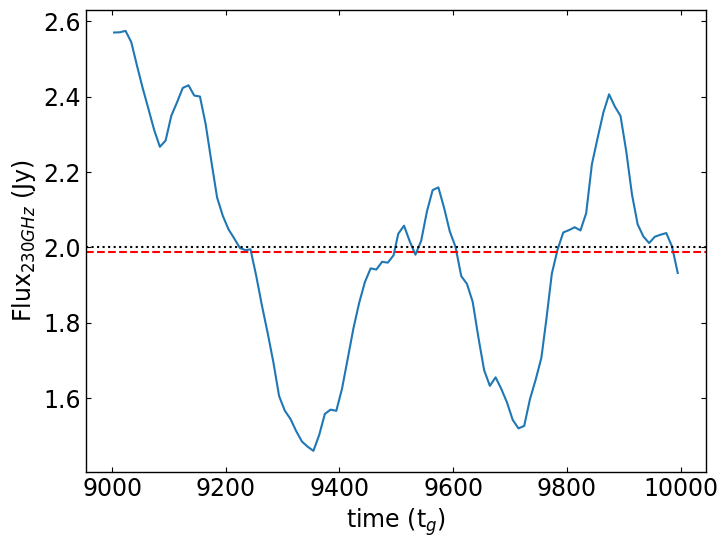

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.570567 Jy at 9003.597816
312:: 2.571181 Jy at 9013.664967
313:: 2.574902 Jy at 9023.730951
314:: 2.545096 Jy at 9033.794470
315:: 2.482502 Jy at 9043.862656
316:: 2.422673 Jy at 9053.929463
317:: 2.367719 Jy at 9063.995875
318:: 2.311776 Jy at 9074.060236
319:: 2.266992 Jy at 9084.125014
320:: 2.283646 Jy at 9094.191161
321:: 2.349728 Jy at 9104.258463
322:: 2.385288 Jy at 9114.324296
323:: 2.423339 Jy at 9124.388087
324:: 2.430449 Jy at 9134.450798
325:: 2.403139 Jy at 9144.515488
326:: 2.400650 Jy at 9154.580838
327:: 2.327104 Jy at 9164.643343
328:: 2.227993 Jy at 9174.708090
329:: 2.132191 Jy at 9184.774596
330:: 2.083447 Jy at 9194.841238
331:: 2.047620 Jy at 9204.906551
332:: 2.023426 Jy at 9214.968879
333:: 1.997907 Jy at 9225.032659
334:: 1.992360 Jy at 9235.096933
335:: 1.994821 Jy at 9243.486122
336:: 1.924453 Jy at 9253.551623
337:: 1.845533 Jy at 9263.615142
338:: 1.772623 Jy at 9273.678488
339:: 1.694854 Jy at 9283.741347
340:: 1.604991 Jy at 9293.805262
341:: 1.56

In [14]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 30, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh20/inc30/BHOSS_CODE
311, flux: 2.437579 at 9003.597816
312, flux: 2.432028 at 9013.664967
313, flux: 2.420528 at 9023.730951
314, flux: 2.369919 at 9033.794470
315, flux: 2.295681 at 9043.862656
316, flux: 2.222952 at 9053.929463
317, flux: 2.149890 at 9063.995875
318, flux: 2.099717 at 9074.060236
319, flux: 2.057646 at 9084.125014
320, flux: 2.086783 at 9094.191161
321, flux: 2.143440 at 9104.258463
322, flux: 2.171844 at 9114.324296
323, flux: 2.225978 at 9124.388087
324, flux: 2.252255 at 9134.450798
325, flux: 2.245366 at 9144.515488
326, flux: 2.273310 at 9154.580838
327, flux: 2.218671 at 9164.643343
328, flux: 2.138621 at 9174.708090
329, flux: 2.062670 at 9184.774596
330, flux: 2.023655 at 9194.841238
331, flux: 1.990880 at 9204.906551
332, flux: 1.978719 at 9214.968879
333, flux: 1.968485 at 9225.032659
334, flux: 1.981657 at 9235.096933
335, flux: 1.997000 at 9243.486122
336, flux: 1.932022 at 9253.551623
337, 

In [15]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh20/inc30/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [16]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh20/inc30/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 1.964975 Jy, the density scale = 1.370000e-18


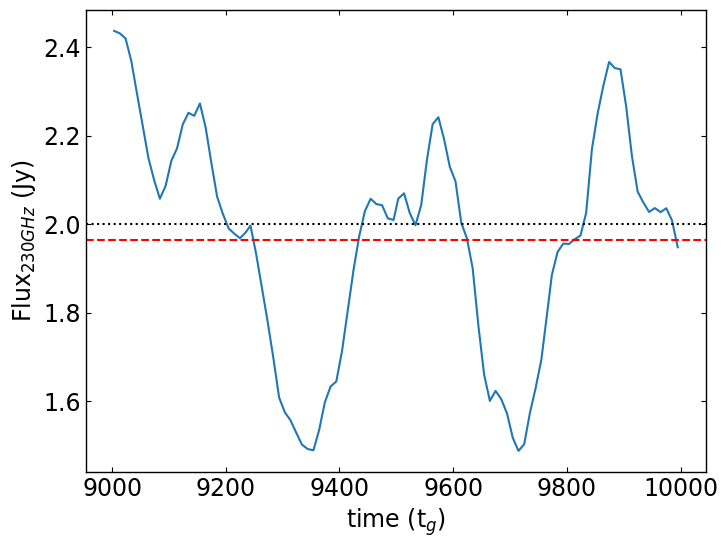

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [18]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.437579 Jy at 9003.597816
312:: 2.432028 Jy at 9013.664967
313:: 2.420528 Jy at 9023.730951
314:: 2.369919 Jy at 9033.794470
315:: 2.295681 Jy at 9043.862656
316:: 2.222952 Jy at 9053.929463
317:: 2.149890 Jy at 9063.995875
318:: 2.099717 Jy at 9074.060236
319:: 2.057646 Jy at 9084.125014
320:: 2.086783 Jy at 9094.191161
321:: 2.143440 Jy at 9104.258463
322:: 2.171844 Jy at 9114.324296
323:: 2.225978 Jy at 9124.388087
324:: 2.252255 Jy at 9134.450798
325:: 2.245366 Jy at 9144.515488
326:: 2.273310 Jy at 9154.580838
327:: 2.218671 Jy at 9164.643343
328:: 2.138621 Jy at 9174.708090
329:: 2.062670 Jy at 9184.774596
330:: 2.023655 Jy at 9194.841238
331:: 1.990880 Jy at 9204.906551
332:: 1.978719 Jy at 9214.968879
333:: 1.968485 Jy at 9225.032659
334:: 1.981657 Jy at 9235.096933
335:: 1.997000 Jy at 9243.486122
336:: 1.932022 Jy at 9253.551623
337:: 1.856050 Jy at 9263.615142
338:: 1.779571 Jy at 9273.678488
339:: 1.697197 Jy at 9283.741347
340:: 1.607917 Jy at 9293.805262
341:: 1.57

In [19]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 50, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh20/inc50/BHOSS_CODE
311, flux: 2.324413 at 9003.597816
312, flux: 2.328316 at 9013.664967
313, flux: 2.316047 at 9023.730951
314, flux: 2.254874 at 9033.794470
315, flux: 2.167107 at 9043.862656
316, flux: 2.084307 at 9053.929463
317, flux: 1.998769 at 9063.995875
318, flux: 1.957234 at 9074.060236
319, flux: 1.930819 at 9084.125014
320, flux: 1.981209 at 9094.191161
321, flux: 2.033133 at 9104.258463
322, flux: 2.058387 at 9114.324296
323, flux: 2.134932 at 9124.388087
324, flux: 2.175599 at 9134.450798
325, flux: 2.167627 at 9144.515488
326, flux: 2.202253 at 9154.580838
327, flux: 2.155562 at 9164.643343
328, flux: 2.095913 at 9174.708090
329, flux: 2.030447 at 9184.774596
330, flux: 1.993883 at 9194.841238
331, flux: 1.967727 at 9204.906551
332, flux: 1.957460 at 9214.968879
333, flux: 1.952164 at 9225.032659
334, flux: 1.984572 at 9235.096933
335, flux: 2.021842 at 9243.486122
336, flux: 1.950159 at 9253.551623
337, 

In [20]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh20/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [21]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh20/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 1.967139 Jy, the density scale = 1.310000e-18


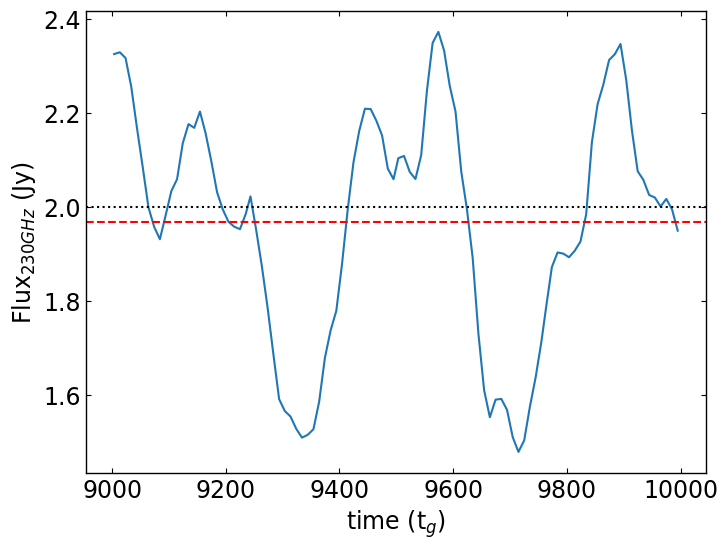

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [23]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.324413 Jy at 9003.597816
312:: 2.328316 Jy at 9013.664967
313:: 2.316047 Jy at 9023.730951
314:: 2.254874 Jy at 9033.794470
315:: 2.167107 Jy at 9043.862656
316:: 2.084307 Jy at 9053.929463
317:: 1.998769 Jy at 9063.995875
318:: 1.957234 Jy at 9074.060236
319:: 1.930819 Jy at 9084.125014
320:: 1.981209 Jy at 9094.191161
321:: 2.033133 Jy at 9104.258463
322:: 2.058387 Jy at 9114.324296
323:: 2.134932 Jy at 9124.388087
324:: 2.175599 Jy at 9134.450798
325:: 2.167627 Jy at 9144.515488
326:: 2.202253 Jy at 9154.580838
327:: 2.155562 Jy at 9164.643343
328:: 2.095913 Jy at 9174.708090
329:: 2.030447 Jy at 9184.774596
330:: 1.993883 Jy at 9194.841238
331:: 1.967727 Jy at 9204.906551
332:: 1.957460 Jy at 9214.968879
333:: 1.952164 Jy at 9225.032659
334:: 1.984572 Jy at 9235.096933
335:: 2.021842 Jy at 9243.486122
336:: 1.950159 Jy at 9253.551623
337:: 1.872483 Jy at 9263.615142
338:: 1.784450 Jy at 9273.678488
339:: 1.686645 Jy at 9283.741347
340:: 1.591039 Jy at 9293.805262
341:: 1.56

In [24]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 70, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh20/inc70/BHOSS_CODE
311, flux: 2.351313 at 9003.597816
312, flux: 2.375037 at 9013.664967
313, flux: 2.353580 at 9023.730951
314, flux: 2.283027 at 9033.794470
315, flux: 2.197079 at 9043.862656
316, flux: 2.096123 at 9053.929463
317, flux: 1.995549 at 9063.995875
318, flux: 1.957518 at 9074.060236
319, flux: 1.954701 at 9084.125014
320, flux: 2.054107 at 9094.191161
321, flux: 2.148510 at 9104.258463
322, flux: 2.184230 at 9114.324296
323, flux: 2.310694 at 9124.388087
324, flux: 2.404294 at 9134.450798
325, flux: 2.334812 at 9144.515488
326, flux: 2.315627 at 9154.580838
327, flux: 2.259627 at 9164.643343
328, flux: 2.222137 at 9174.708090
329, flux: 2.156686 at 9184.774596
330, flux: 2.140270 at 9194.841238
331, flux: 2.118667 at 9204.906551
332, flux: 2.061409 at 9214.968879
333, flux: 2.017133 at 9225.032659
334, flux: 2.067651 at 9235.096933
335, flux: 2.105467 at 9243.486122
336, flux: 2.013296 at 9253.551623
337, 

In [25]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [26]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc70/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.075343 Jy, the density scale = 1.250000e-18


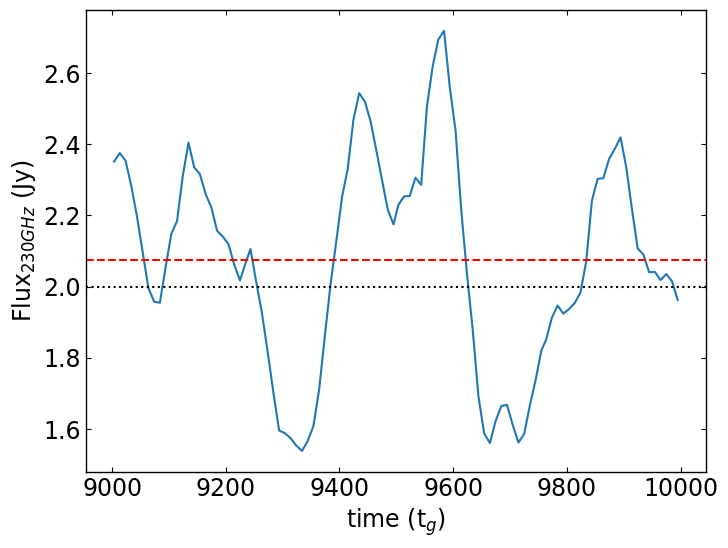

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [28]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.351313 Jy at 9003.597816
312:: 2.375037 Jy at 9013.664967
313:: 2.353580 Jy at 9023.730951
314:: 2.283027 Jy at 9033.794470
315:: 2.197079 Jy at 9043.862656
316:: 2.096123 Jy at 9053.929463
317:: 1.995549 Jy at 9063.995875
318:: 1.957518 Jy at 9074.060236
319:: 1.954701 Jy at 9084.125014
320:: 2.054107 Jy at 9094.191161
321:: 2.148510 Jy at 9104.258463
322:: 2.184230 Jy at 9114.324296
323:: 2.310694 Jy at 9124.388087
324:: 2.404294 Jy at 9134.450798
325:: 2.334812 Jy at 9144.515488
326:: 2.315627 Jy at 9154.580838
327:: 2.259627 Jy at 9164.643343
328:: 2.222137 Jy at 9174.708090
329:: 2.156686 Jy at 9184.774596
330:: 2.140270 Jy at 9194.841238
331:: 2.118667 Jy at 9204.906551
332:: 2.061409 Jy at 9214.968879
333:: 2.017133 Jy at 9225.032659
334:: 2.067651 Jy at 9235.096933
335:: 2.105467 Jy at 9243.486122
336:: 2.013296 Jy at 9253.551623
337:: 1.925842 Jy at 9263.615142
338:: 1.817023 Jy at 9273.678488
339:: 1.702916 Jy at 9283.741347
340:: 1.596079 Jy at 9293.805262
341:: 1.58

In [29]:
ind,time,z_tot,dscale = bhoss_avg(20, 1, 1, 90, 0, "MADS41A5")

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh20/inc90/BHOSS_CODE
311, flux: 2.311781 at 9003.597816
312, flux: 2.344688 at 9013.664967
313, flux: 2.382947 at 9023.730951
314, flux: 2.377524 at 9033.794470
315, flux: 2.317324 at 9043.862656
316, flux: 2.140900 at 9053.929463
317, flux: 1.928059 at 9063.995875
318, flux: 1.877457 at 9074.060236
319, flux: 1.935372 at 9084.125014
320, flux: 2.083366 at 9094.191161
321, flux: 2.222842 at 9104.258463
322, flux: 2.240547 at 9114.324296
323, flux: 2.360998 at 9124.388087
324, flux: 2.448908 at 9134.450798
325, flux: 2.423281 at 9144.515488
326, flux: 2.432920 at 9154.580838
327, flux: 2.364259 at 9164.643343
328, flux: 2.373061 at 9174.708090
329, flux: 2.269747 at 9184.774596
330, flux: 2.162977 at 9194.841238
331, flux: 2.143611 at 9204.906551
332, flux: 2.147641 at 9214.968879
333, flux: 2.063002 at 9225.032659
334, flux: 2.108835 at 9235.096933
335, flux: 2.134373 at 9243.486122
336, flux: 2.088156 at 9253.551623
337, 

In [30]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [31]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh10/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 311/410/100
average z_tot = 2.116519 Jy, the density scale = 1.210000e-18


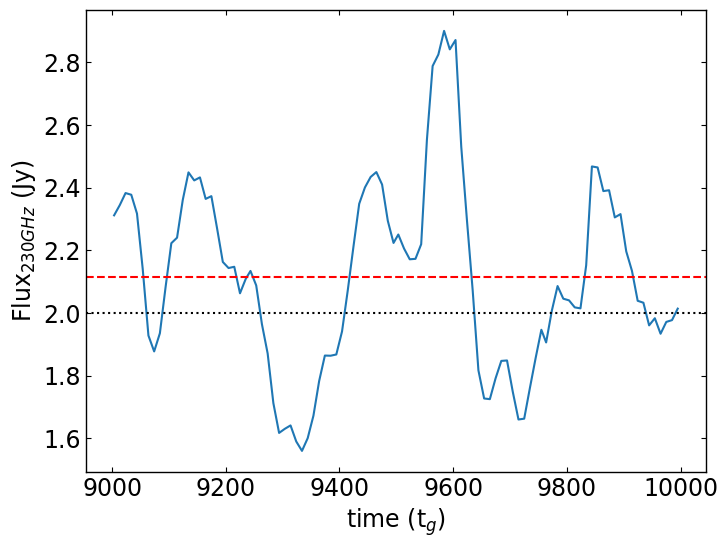

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [33]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

311:: 2.311781 Jy at 9003.597816
312:: 2.344688 Jy at 9013.664967
313:: 2.382947 Jy at 9023.730951
314:: 2.377524 Jy at 9033.794470
315:: 2.317324 Jy at 9043.862656
316:: 2.140900 Jy at 9053.929463
317:: 1.928059 Jy at 9063.995875
318:: 1.877457 Jy at 9074.060236
319:: 1.935372 Jy at 9084.125014
320:: 2.083366 Jy at 9094.191161
321:: 2.222842 Jy at 9104.258463
322:: 2.240547 Jy at 9114.324296
323:: 2.360998 Jy at 9124.388087
324:: 2.448908 Jy at 9134.450798
325:: 2.423281 Jy at 9144.515488
326:: 2.432920 Jy at 9154.580838
327:: 2.364259 Jy at 9164.643343
328:: 2.373061 Jy at 9174.708090
329:: 2.269747 Jy at 9184.774596
330:: 2.162977 Jy at 9194.841238
331:: 2.143611 Jy at 9204.906551
332:: 2.147641 Jy at 9214.968879
333:: 2.063002 Jy at 9225.032659
334:: 2.108835 Jy at 9235.096933
335:: 2.134373 Jy at 9243.486122
336:: 2.088156 Jy at 9253.551623
337:: 1.964343 Jy at 9263.615142
338:: 1.870928 Jy at 9273.678488
339:: 1.712310 Jy at 9283.741347
340:: 1.617318 Jy at 9293.805262
341:: 1.63